In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [592]:
df = pd.read_csv("C:\\Users\\karan\\Downloads\\imdb_top_1000.csv")

Info


In [595]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


Head

In [598]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


Dropping released year with value as PG

In [601]:
df = df[df["Released_Year"] != 'PG']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    999 non-null    object 
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 132.7+ KB


Changing data type of Gross to float64 and Released Year as date


In [604]:
df = df.convert_dtypes()
df['Gross'] = df['Gross'].str.replace(',', '')
df = df.astype({'Gross' : 'float'})

df_dt = df.copy()
df_dt['Released_Year'] = pd.to_datetime(df_dt['Released_Year'])
df_dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Poster_Link    999 non-null    string        
 1   Series_Title   999 non-null    string        
 2   Released_Year  999 non-null    datetime64[ns]
 3   Certificate    898 non-null    string        
 4   Runtime        999 non-null    string        
 5   Genre          999 non-null    string        
 6   IMDB_Rating    999 non-null    Float64       
 7   Overview       999 non-null    string        
 8   Meta_score     842 non-null    Int64         
 9   Director       999 non-null    string        
 10  Star1          999 non-null    string        
 11  Star2          999 non-null    string        
 12  Star3          999 non-null    string        
 13  Star4          999 non-null    string        
 14  No_of_Votes    999 non-null    Int64         
 15  Gross          830 non-null 

Checking null

In [607]:
df.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [609]:
df_null = df[df.isnull().any(axis = 1)]
df_null.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
18,https://m.media-amazon.com/images/M/MV5BNjViNW...,Hamilton,2020,PG-13,160 min,"Biography, Drama, History",8.6,The real life of one of America's foremost fou...,90,Thomas Kail,Lin-Manuel Miranda,Phillipa Soo,Leslie Odom Jr.,Renée Elise Goldsberry,55291,NaN
20,https://m.media-amazon.com/images/M/MV5BOTc2ZT...,Soorarai Pottru,2020,U,153 min,Drama,8.6,"Nedumaaran Rajangam ""Maara"" sets out to make t...",<NA>,Sudha Kongara,Suriya,Madhavan,Paresh Rawal,Aparna Balamurali,54995,NaN
30,https://m.media-amazon.com/images/M/MV5BYjBmYT...,Seppuku,1962,<NA>,133 min,"Action, Drama, Mystery",8.6,When a ronin requesting seppuku at a feudal lo...,85,Masaki Kobayashi,Tatsuya Nakadai,Akira Ishihama,Shima Iwashita,Tetsurô Tanba,42004,NaN
32,https://m.media-amazon.com/images/M/MV5BZjc4ND...,It's a Wonderful Life,1946,PG,130 min,"Drama, Family, Fantasy",8.6,An angel is sent from Heaven to help a despera...,89,Frank Capra,James Stewart,Donna Reed,Lionel Barrymore,Thomas Mitchell,405801,NaN
46,https://m.media-amazon.com/images/M/MV5BZmY2Nj...,Hotaru no haka,1988,U,89 min,"Animation, Drama, War",8.5,A young boy and his little sister struggle to ...,94,Isao Takahata,Tsutomu Tatsumi,Ayano Shiraishi,Akemi Yamaguchi,Yoshiko Shinohara,235231,NaN


In [611]:
df_null.isnull().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

Filling missing values of certificates

In [630]:
df.fillna({'Certificate' : "Unknown"}, inplace = True)
df_dt.fillna({'Certificate' : "Unknown"}, inplace = True)

Creating dfs dropping nan values of Metascore and Gross

In [633]:
df_mtscr = df.dropna(subset = 'Meta_score')
df_mtscr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 842 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    842 non-null    string 
 1   Series_Title   842 non-null    string 
 2   Released_Year  842 non-null    string 
 3   Certificate    842 non-null    string 
 4   Runtime        842 non-null    string 
 5   Genre          842 non-null    string 
 6   IMDB_Rating    842 non-null    Float64
 7   Overview       842 non-null    string 
 8   Meta_score     842 non-null    Int64  
 9   Director       842 non-null    string 
 10  Star1          842 non-null    string 
 11  Star2          842 non-null    string 
 12  Star3          842 non-null    string 
 13  Star4          842 non-null    string 
 14  No_of_Votes    842 non-null    Int64  
 15  Gross          749 non-null    float64
dtypes: Float64(1), Int64(2), float64(1), string(12)
memory usage: 114.3 KB


In [635]:
df_gross = df.dropna(subset = "Gross")
df_gross.info()

<class 'pandas.core.frame.DataFrame'>
Index: 830 entries, 0 to 997
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    830 non-null    string 
 1   Series_Title   830 non-null    string 
 2   Released_Year  830 non-null    string 
 3   Certificate    830 non-null    string 
 4   Runtime        830 non-null    string 
 5   Genre          830 non-null    string 
 6   IMDB_Rating    830 non-null    Float64
 7   Overview       830 non-null    string 
 8   Meta_score     749 non-null    Int64  
 9   Director       830 non-null    string 
 10  Star1          830 non-null    string 
 11  Star2          830 non-null    string 
 12  Star3          830 non-null    string 
 13  Star4          830 non-null    string 
 14  No_of_Votes    830 non-null    Int64  
 15  Gross          830 non-null    float64
dtypes: Float64(1), Int64(2), float64(1), string(12)
memory usage: 112.7 KB


In [637]:
df_dropna = df_dt.dropna()
df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 749 entries, 0 to 997
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Poster_Link    749 non-null    string        
 1   Series_Title   749 non-null    string        
 2   Released_Year  749 non-null    datetime64[ns]
 3   Certificate    749 non-null    string        
 4   Runtime        749 non-null    string        
 5   Genre          749 non-null    string        
 6   IMDB_Rating    749 non-null    Float64       
 7   Overview       749 non-null    string        
 8   Meta_score     749 non-null    Int64         
 9   Director       749 non-null    string        
 10  Star1          749 non-null    string        
 11  Star2          749 non-null    string        
 12  Star3          749 non-null    string        
 13  Star4          749 non-null    string        
 14  No_of_Votes    749 non-null    Int64         
 15  Gross          749 non-null 

Grouping df by year

In [747]:
df_year = df_dropna.groupby('Released_Year').agg('mean', numeric_only = True)
df_year

,IMDB_Rating,Meta_score,No_of_Votes,Gross
Released_Year,,,,
1925-01-01,8.0,97.0,53054.0,5.097000e+04
1927-01-01,8.3,98.0,159992.0,1.236166e+06
1930-01-01,8.0,91.0,57318.0,3.270000e+06
1931-01-01,8.5,99.0,167839.0,1.918100e+04
1933-01-01,7.9,90.0,78991.0,1.000000e+07
...,...,...,...,...
2015-01-01,7.826316,79.789474,366076.157895,1.287547e+08
2016-01-01,7.905,78.95,307471.8,1.290071e+08
2017-01-01,7.821053,79.473684,292217.578947,1.074277e+08


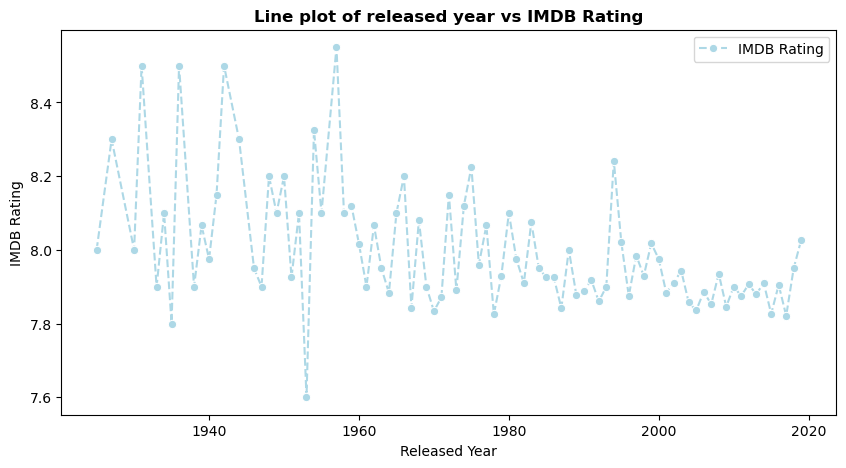

In [642]:
def line_plot(df):
    plt.figure(figsize = (10, 5))
    sns.lineplot(x = df.index, y = 'IMDB_Rating', data = df, color = 'lightblue', linestyle = '--', marker = 'o', label = 'IMDB Rating')
    plt.title("Line plot of released year vs IMDB Rating", fontweight = 'bold')
    plt.xlabel("Released Year")
    plt.ylabel("IMDB Rating")
    plt.show()

line_plot(df_year)

Grouping df by Certificate

In [645]:
agg_fns = {"IMDB_Rating" : "mean", "Meta_score" : "mean", "Gross" : "mean", 'No_of_Votes' : 'mean', "No_of_Votes" : "mean"}
df_certificate = df_dropna.groupby('Certificate').agg(agg_fns)
df_certificate

,IMDB_Rating,Meta_score,Gross,No_of_Votes
Certificate,,,,
A,8.001149,78.011494,6.603609e+07,472140.402299
Approved,8.016667,84.833333,6.949014e+06,92205.833333
G,8.022222,86.333333,5.508732e+07,142668.777778
GP,7.6,50.0,1.378435e+06,45338.0
PG,7.905263,81.421053,2.015480e+07,126296.0
PG-13,7.784211,75.0,3.780400e+07,155005.526316
Passed,8.044444,89.222222,8.609353e+06,88852.444444
R,7.866412,74.335878,2.653840e+07,230302.763359
TV-PG,8.0,87.0,1.066620e+05,45803.0


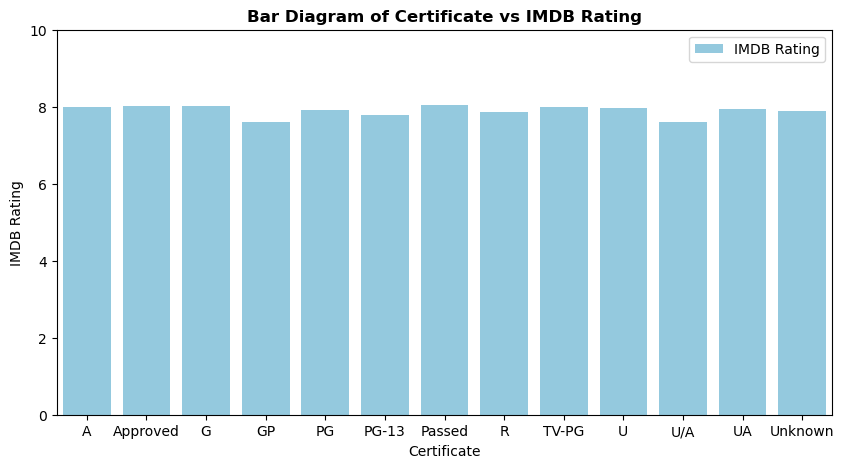

In [647]:
def bar_plot(df):
    plt.figure(figsize = (10,5))
    sns.barplot(x = df.index, y = 'IMDB_Rating', data = df , color = 'skyblue', label = 'IMDB Rating')
    plt.ylim(0, 10)
    plt.ylabel("IMDB Rating")
    plt.title("Bar Diagram of Certificate vs IMDB Rating", fontweight = 'bold')
    plt.legend()
    plt.show()

bar_plot(df_certificate)

Top 10 Directors with most films in top 1000 IMDB Rating along with their highest gross, imdb rating and metascore

In [727]:
df_dir_name = df['Director'].value_counts().head(10)
df_dir = df_dropna.groupby(by = 'Director').agg({"IMDB_Rating" : "max", "Meta_score" : "max", "Gross" : "max"})
df_dir = df_dir[df_dir.index.isin(df_dir_name.index)]
df_dir['Movies'] = df_dir_name
df_dir = df_dir[['Movies', 'IMDB_Rating', 'Meta_score', 'Gross']]
df_dir.sort_values(by = 'Movies', ascending = False, inplace = True)
df_dir

,Movies,IMDB_Rating,Meta_score,Gross
Director,,,,
Alfred Hitchcock,14,8.5,100,36764313.0
Steven Spielberg,13,8.9,94,435110554.0
Hayao Miyazaki,11,8.6,96,15090400.0
Akira Kurosawa,10,8.6,98,4135750.0
Martin Scorsese,10,8.7,94,132384315.0
Billy Wilder,9,8.3,98,25000000.0
Stanley Kubrick,9,8.4,97,56954992.0
Woody Allen,9,8.0,92,56816662.0
Christopher Nolan,8,9.0,94,534858444.0


Top 10 movies with highest rated IMDB Rating

In [756]:
df_top10_movie = df[['Series_Title', 'IMDB_Rating', 'Gross']].sort_values(by = 'IMDB_Rating', ascending = False).head(10)
df_top10_movie.set_index((x for x in range(1, 11)), inplace = True)
df_top10_movie

,Series_Title,IMDB_Rating,Gross
1,The Shawshank Redemption,9.3,28341469.0
2,The Godfather,9.2,134966411.0
3,The Dark Knight,9.0,534858444.0
4,The Godfather: Part II,9.0,57300000.0
5,12 Angry Men,9.0,4360000.0
6,The Lord of the Rings: The Return of the King,8.9,377845905.0
7,Pulp Fiction,8.9,107928762.0
8,Schindler's List,8.9,96898818.0
9,The Lord of the Rings: The Fellowship of the Ring,8.8,315544750.0
10,Forrest Gump,8.8,330252182.0


Correlation 

In [656]:
df_dropna.corr(numeric_only = True)

,IMDB_Rating,Meta_score,No_of_Votes,Gross
IMDB_Rating,1.000000,0.282887,0.614358,0.129378
Meta_score,0.282887,1.000000,0.010298,-0.030560
No_of_Votes,0.614358,0.010298,1.000000,0.556003
Gross,0.129378,-0.030560,0.556003,1.000000


Describe

In [777]:
df_dropna.describe(include = ['int64', 'float64'])

,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,749.0,749.0,749.0,7.490000e+02
mean,7.935247,77.460614,342230.049399,7.482005e+07
std,0.289036,12.502304,351203.877183,1.133460e+08
min,7.6,28.0,25198.0,1.305000e+03
25%,7.7,70.0,88511.0,5.014000e+06
50%,7.9,78.0,219466.0,3.180000e+07
75%,8.1,86.0,481918.0,9.696269e+07
max,9.3,100.0,2343110.0,9.366622e+08
